In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
InteractiveShell.log_level = 'INFO'

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

# Data Analysis with Python for Excel User - Merge and Reshape Data

<!-- PELICAN_BEGIN_SUMMARY -->

As a CPA, I have had to work with datasets from data processing applications, such as insurance application, general ledger,
regulatory reporting system and etc.

The process is to incorporate all the data then create reinsurance analysis for pricing treaties, pro-forma financial analysis
for new business opportunity, regulatory compliance and risk accessment for stress test.

As an old saying that the data needs to be valid, otherwise will be "Garbage In and Garbage Out".

The first step for data preparation process involves loading, validating, merging and reshaping of data.

<!-- PELICAN_END_SUMMARY -->

### How to get a clean and valid dataset?
-  Join two or more dataframes by using a key or composite key
-  Spot invalid data by using pandas 
    - pandas offers functionality similar to Excel Vlookup, Sumif etc.
    - I expect every fellow accountant reading this blog might be asking "Why don't I just continue using Excel?"
    - It took me a while to understand that python-pandas offer much more effectively way to deal with huge dataset
-  Remove duplicate data
-  Calculate the average value or the maximum value of certain dataset

### Example - Reinsurance Premium Loss Data
The example is to merge and reshape data from different application and ultimately determing business reinsurance coverage.
This is a simplified and hypothetical example, but it's a great illustration of what Python can do for financial analysis. 
- The example data is generated by randomization algorithms
- The input data is an excel file consisting of 2 tabs: premium and loss    

### Understand the business, what is abnormal value for this business?
- If average premium per policy is between 10K to 200K, the premium outside this range is invalid
- If maximum ceded reinsurance retention is 500K, the ceded recoverable greater than 500K is invalid 

### View Excel File with Mulitple Tabs
- List of tabs
- View each tabs

In [63]:
df = pd.ExcelFile('data/Premium_Loss.xlsx')
print ('df.sheet_names=%s' % df.sheet_names)

df.sheet_names=['premium', 'loss']


In [64]:
datafile = pd.read_excel('data/Premium_Loss.xlsx', sheet_name = "premium")
datafile[0:5] 
Count_Row=datafile.shape[0] 
print("There are %s policies" % (Count_Row))  
df5=datafile.duplicated()
df5.head()

,Policy Number,First Name,Last Name,Policy Effective Date,LOB,Policy Type,Premium,Coverage,Excess Coverage,Excess Policy
0,10880,Kurtis,Dumm,2017-07-08,Phy,CM,232058,1000000,3900000,96289.0
1,10962,Taisha,Whack,2017-09-19,Dentist,OCC,11308,1000000,3900000,91809.0
2,10962,Taisha,Whack,2017-09-19,Dentist,OCC,11308,1000000,3900000,91809.0
3,11339,Ricarda,Hotaka,2017-12-25,Podiatrist,OCC,2651,1000000,3900000,91367.0
4,11339,Ricarda,Hotaka,2017-12-25,Podiatrist,OCC,2651,1000000,3900000,91367.0


There are 200 policies


0    False
1    False
2     True
3    False
4     True
dtype: bool

*** duplicate rows were found in the file, more detail about removing duplicate rows at the end of the blog

In [5]:
datafile = pd.read_excel('data/Premium_Loss.xlsx', sheet_name = "loss") 
datafile[0:5]
Count_Row=datafile.shape[0] 
print("There are %s claims with losses" % (Count_Row))  

,Policy Number,Claim Number,Policy Type,First Name,Last Name,LossDate,LAE,Loss,Premium
0,35033,880247,OCC,Adolph,Iwan,2017-03-17,84373.0,10000000.0,176966.0
1,35033,880247,OCC,Adolph,Iwan,2017-03-17,84373.0,5000000.0,176966.0
2,47755,880255,OCC,Cherryl,Aven,2017-11-25,88205.0,4000000.0,116133.0
3,47755,880255,OCC,Cherryl,Aven,2017-11-25,88205.0,54785.0,116133.0
4,36838,880258,OCC,Franklin,Maen,2017-03-18,36440.0,54880.0,65872.0


There are 216 claims with losses


### How many policies have incurred losses? and save the result to Excel
- Use Merge function with key identifier Policy Number
- Pandas.merge connects rows in DataFrames based on one or more keys
- By default merge does an 'inner' join; the keys in the result are the intersection with prepend X and Y
- Save the merge file to Excel
- How many policies have incurred losses? 20 policies with incurred losses by Count_Row function

In [65]:
fs1 = df.parse("premium")
fs2 = df.parse("loss")
df1 = pd.merge(fs1, fs2, on='Policy Number')
df1.head(3)
df1.to_excel('data/incurredloss.xlsx') 
Count_Row=df1.shape[0] 
print("There are %s policies with incurred losses" % (Count_Row))  

,Policy Number,First Name_x,Last Name_x,Policy Effective Date,LOB,Policy Type_x,Premium_x,Coverage,Excess Coverage,Excess Policy,Claim Number,Policy Type_y,First Name_y,Last Name_y,LossDate,LAE,Loss,Premium_y
0,10880,Kurtis,Dumm,2017-07-08,Phy,CM,232058,1000000,3900000,96289.0,880206,CM,Kurtis,Dumm,2017-09-24,74793.0,250000,232058.0
1,10948,Florencia,Bilyk,2017-06-05,Podiatrist,CM,5132,1000000,3900000,99671.0,880208,CM,Florencia,Bilyk,2018-04-22,38573.0,800000,5132.0
2,10244,Wonda,Hallsworth,2017-08-07,Dentist,OCC,13330,1000000,3900000,92319.0,880016,OCC,Wonda,Hallsworth,2017-09-14,44072.0,1500000,13330.0


There are 24 policies with incurred losses


### Which policy has no incurred losses? use Outer join to merge the data
- Other possible options are 'left', 'right', and 'outer'. 
- The outer join takes the union of the keys, combining the effect of applying both left and right joins
- You probably noticed that policy 10962 has no associated loss data, the missing loss result will mark as NaN

In [66]:
fs1 = df.parse("premium")
fs2 = df.parse("loss")
df1 = pd.merge(fs1, fs2, on='Policy Number', how='outer')
df1.head(10)

,Policy Number,First Name_x,Last Name_x,Policy Effective Date,LOB,Policy Type_x,Premium_x,Coverage,Excess Coverage,Excess Policy,Claim Number,Policy Type_y,First Name_y,Last Name_y,LossDate,LAE,Loss,Premium_y
0,10880,Kurtis,Dumm,2017-07-08,Phy,CM,232058.0,1000000.0,3900000.0,96289.0,880206.0,CM,Kurtis,Dumm,2017-09-24,74793.0,250000.0,232058.0
1,10962,Taisha,Whack,2017-09-19,Dentist,OCC,11308.0,1000000.0,3900000.0,91809.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
2,10962,Taisha,Whack,2017-09-19,Dentist,OCC,11308.0,1000000.0,3900000.0,91809.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
3,11339,Ricarda,Hotaka,2017-12-25,Podiatrist,OCC,2651.0,1000000.0,3900000.0,91367.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
4,11339,Ricarda,Hotaka,2017-12-25,Podiatrist,OCC,2651.0,1000000.0,3900000.0,91367.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
5,10948,Florencia,Bilyk,2017-06-05,Podiatrist,CM,5132.0,1000000.0,3900000.0,99671.0,880208.0,CM,Florencia,Bilyk,2018-04-22,38573.0,800000.0,5132.0
6,10244,Wonda,Hallsworth,2017-08-07,Dentist,OCC,13330.0,1000000.0,3900000.0,92319.0,880016.0,OCC,Wonda,Hallsworth,2017-09-14,44072.0,1500000.0,13330.0
7,11106,NaN,Sarasota Hospital,2017-08-14,Hospital,OCC,446997.0,1000000.0,3900000.0,97303.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
8,11271,Zola,Fitzwallace,2017-07-15,Dentist,OCC,24252.0,1000000.0,3900000.0,97474.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN
9,10509,Patrica,Hartle,2017-02-09,Podiatrist,OCC,5647.0,1000000.0,3900000.0,96730.0,880041.0,OCC,Patrica,Hartle,2017-11-16,88069.0,1000000.0,5647.0


### Data Transformation - Removing Duplicates
- The DataFrame method Duplicated returns a boolean series
- True means duplicated data
- drop_duplicates returns a DataFrame where the duplicated array is True
- Both of these methods by default consider all of the columns must be duplicated

In [12]:
df4=datafile.duplicated()
df4.head()

0    False
1    False
2     True
3    False
4     True
dtype: bool

In [13]:
df5=datafile.drop_duplicates()
df5.head()

,Policy Number,First Name,Last Name,Policy Effective Date,LOB,Policy Type,Premium,Coverage,Excess Coverage,Excess Policy
0,10880,Kurtis,Dumm,2017-07-08,Phy,CM,232058,1000000,3900000,96289.0
1,10962,Taisha,Whack,2017-09-19,Dentist,OCC,11308,1000000,3900000,91809.0
3,11339,Ricarda,Hotaka,2017-12-25,Podiatrist,OCC,2651,1000000,3900000,91367.0
5,10948,Florencia,Bilyk,2017-06-05,Podiatrist,CM,5132,1000000,3900000,99671.0
6,10244,Wonda,Hallsworth,2017-08-07,Dentist,OCC,13330,1000000,3900000,92319.0


### Analyze loss data for placing reinsurance treaty

### Detecting and Filtering Outliers - how to detecting abnormal loss value?
  - Filtering or transforming outliers by applying array operations
  - Loss should not exceeded 1 million since the policy limit is 1M
  - Use the abs method in column Loss when loss is exceeding 1M 

In [40]:
col = fs2['Loss']
col[np.abs(col) > 1000000]

0     10000000.0
1      5000000.0
2      4000000.0
6      1500000.0
8      2500000.0
13    10000000.0
16     7000000.0
23     3000000.0
Name: Loss, dtype: float64

### Discretization and Binning - how to seperate loss into reinsurance layer?
- Separated loss into “bins” for reinsurance analysis
- We can group the loss range and analyze the loss layer for placing reinsurance treaty
- Group claim data into discrete loss buckets
- Let’s divide these into bins of 1 to 50000, 50001 to 75000, 75001 to 1000000, and finally 1000001 and greater
- To do so, you have to use cut, a function in pandas

In [97]:
LossDistribution = fs2['Loss']
bins = [1, 50000, 75000, 500000, 1000000, 20000000 ]
cats = pd.cut(LossDistribution, bins)
cats.head(3)
pd.value_counts(cats)
pd.cut(LossDistribution, [1, 50000, 75000, 500000, 1000000, 20000000], right=False).head(3)
group_names = ['Layer1', 'Layer2', 'Layer3', 'XOL','Clash']
pd.cut(LossDistribution, bins, labels=group_names).head()

0    (1000000, 20000000]
1    (1000000, 20000000]
2    (1000000, 20000000]
Name: Loss, dtype: category
Categories (5, interval[int64]): [(1, 50000] < (50000, 75000] < (75000, 500000] < (500000, 1000000] < (1000000, 20000000]]

(75000, 500000]        150
(50000, 75000]          35
(1, 50000]              18
(1000000, 20000000]      8
(500000, 1000000]        5
Name: Loss, dtype: int64

0    [1000000, 20000000)
1    [1000000, 20000000)
2    [1000000, 20000000)
Name: Loss, dtype: category
Categories (5, interval[int64]): [[1, 50000) < [50000, 75000) < [75000, 500000) < [500000, 1000000) < [1000000, 20000000)]

0     Clash
1     Clash
2     Clash
3    Layer2
4    Layer2
Name: Loss, dtype: category
Categories (5, object): [Layer1 < Layer2 < Layer3 < XOL < Clash]

*** 150 claims with loss between 75K to 500k, evaulate reinsurnce need in this loss layer 

### Plotting and Visualization - Dashboard to show loss distribution by line of business
- Part of the reason for this is that in many cases the data needed to make a complete plot is spread across many objects.
- In pandas we have row labels, column labels, and possibly grouping information- 
- many kinds of fully-formed plots that would ordinarily require a lot of matplotlib code can be expressed in one or two concise statements.
- Therefore, pandas has an increasing number of high-level plotting methods for creating standard visualizations that take advantage of how data is organized in DataFrame objects.

### Use panda.DataFrame to plot 
- With a DataFrame, bar plots group the values in each row together in a group in bars, side by side, for each value

In [174]:
df = pd.read_excel('data/Claim.xlsx')
df[0:5]
c = df.groupby('LOB')
c

,Claim_Number,Loss_Date,LAE,Loss,Premium,LOB
0,883745,2016-09-24,95846.0,147030,165910.0,Podiatrist
1,884654,2016-05-14,95514.0,121666,72314.0,Podiatrist
2,880247,2017-03-17,84373.0,10000000,176966.0,Physician
3,880247,2017-03-17,84373.0,5000000,176966.0,Physician
4,884476,2016-10-23,66484.0,141288,74632.0,Podiatrist


In [154]:
c.get_group('Nurse').head()

,Claim_Number,Loss_Date,LAE,Loss,Premium,LOB
14,889851,2016-03-28,25422.0,161796,208103.0,Nurse
15,889591,2016-01-01,75493.0,279318,81236.0,Nurse
23,889877,2016-08-09,80758.0,54114,60416.0,Nurse
24,889550,2016-12-26,81824.0,52413,127804.0,Nurse
30,889443,2016-05-26,38710.0,138060,211168.0,Nurse


In [173]:
# Default to sort by first column is sortable LAE
c.max()
c.min()
c.mean()

,Claim_Number,Loss_Date,LAE,Loss,Premium
LOB,,,,,
Dentist,889215,2016-12-20,98396.0,290832,240383.0
Hospital,886684,2016-12-25,99984.0,298038,245159.0
Nurse,889877,2016-12-28,98914.0,279318,246635.0
Physician,881144,2018-04-22,266019.0,10000000,248063.0
Podiatrist,884888,2016-12-19,98013.0,294633,248669.0


,Claim_Number,Loss_Date,LAE,Loss,Premium
LOB,,,,,
Dentist,886716,2012-12-20,26077.0,28162,11067.0
Hospital,881331,2014-01-04,26687.0,27063,11604.0
Nurse,889258,2012-12-23,25422.0,34679,16548.0
Physician,880016,2014-04-21,36440.0,25404,3555.0
Podiatrist,883421,2016-01-18,25720.0,26062,32051.0


,Claim_Number,LAE,Loss,Premium
LOB,,,,
Dentist,887691.615385,58849.846154,1.204308e+05,132381.153846
Hospital,884071.576923,67452.857143,1.341324e+05,128511.779221
Nurse,889543.666667,67108.809524,1.198330e+05,156925.095238
Physician,880730.512821,91185.393939,1.289591e+06,92691.666667
Podiatrist,884066.743590,63871.210526,1.370890e+05,147778.447368


In [183]:
c.describe().T


LOB                       Dentist       Hospital          Nurse     Physician  \
Claim_Number count      39.000000      78.000000      21.000000  3.900000e+01   
             mean   887691.615385  884071.576923  889543.666667  8.807305e+05   
             std       696.825494    1885.292368     164.153993  3.919108e+02   
             min    886716.000000  881331.000000  889258.000000  8.800160e+05   
             25%    887096.500000  882258.750000  889453.000000  8.803075e+05   
             50%    887629.000000  884159.000000  889536.000000  8.808280e+05   
             75%    888210.500000  885918.250000  889627.000000  8.811165e+05   
             max    889215.000000  886684.000000  889877.000000  8.811440e+05   
LAE          count      39.000000      77.000000      21.000000  3.300000e+01   
             mean    58849.846154   67452.857143   67108.809524  9.118539e+04   
             std     22419.689897   20667.968208   24679.796034  6.140598e+04   
             min     26077.000000   26687.000000   25422.000000  3.644000e+04   
             25%     39682.500000   52542.000000   38710.000000  4.407200e+04   
             50%     55733.000000   65949.000000   74536.000000  8.380300e+04   
             75%     82280.000000   83906.000000   87607.000000  8.820500e+04   
             max     98396.000000   99984.000000   98914.000000  2.660190e+05   
Loss         count      39.000000      78.000000      21.000000  3.900000e+01   
             mean   120430.846154  134132.435897  119832.952381  1.289591e+06   
             std     65823.016078   74520.857552   66931.409306  2.548037e+06   
             min     28162.000000   27063.000000   34679.000000  2.540400e+04   
             25%     76317.000000   75668.500000   56682.000000  7.030800e+04   
             50%    101685.000000  115942.000000  102922.000000  1.665280e+05   
             75%    150865.000000  185442.750000  161796.000000  8.250000e+05   
             max    290832.000000  298038.000000  279318.000000  1.000000e+07   
Premium      count      39.000000      77.000000      21.000000  3.300000e+01   
             mean   132381.153846  128511.779221  156925.095238  9.269167e+04   
             std     68173.058611   71271.028006   65437.784797  7.203135e+04   
             min     11067.000000   11604.000000   16548.000000  3.555000e+03   
             25%     82629.000000   68693.000000  110571.000000  4.740600e+04   
             50%    129721.000000  127505.000000  179483.000000  6.901200e+04   
             75%    191241.000000  189094.000000  211991.000000  1.573400e+05   
             max    240383.000000  245159.000000  246635.000000  2.480630e+05   

LOB                    Podiatrist  
Claim_Number count      39.000000  
             mean   884066.743590  
             std       426.330531  
             min    883421.000000  
             25%    883704.000000  
             50%    884098.000000  
             75%    884333.000000  
             max    884888.000000  
LAE          count      38.000000  
             mean    63871.210526  
             std     24470.395554  
             min     25720.000000  
             25%     40691.750000  
             50%     64691.500000  
             75%     84944.000000  
             max     98013.000000  
Loss         count      39.000000  
             mean   137089.025641  
             std     68111.792047  
             min     26062.000000  
             25%     87240.000000  
             50%    125148.000000  
             75%    181604.000000  
             max    294633.000000  
Premium      count      38.000000  
             mean   147778.447368  
             std     61953.865303  
             min     32051.000000  
             25%     87153.750000  
             50%    158876.500000  
             75%    188406.750000  
             max    248669.000000

Dentist       Hospital          Nurse  \
Claim_Number count      39.000000      78.000000      21.000000   
NaN          mean   887691.615385  884071.576923  889543.666667   
             std       696.825494    1885.292368     164.153993   
             min    886716.000000  881331.000000  889258.000000   
             25%    887096.500000  882258.750000  889453.000000   

                        Physician     Podiatrist  
Claim_Number count      39.000000      39.000000  
NaN          mean   880730.512821  884066.743590  
             std       391.910763     426.330531  
             min    880016.000000  883421.000000  
             25%    880307.500000  883704.000000

In [187]:
c.describe().T.to_excel('data/claim_distribution.xlsx')
dft = pd.read_excel('data/claim_distribution.xlsx')
dft.head(10)


Dentist       Hospital          Nurse  \
Claim_Number count      39.000000      78.000000      21.000000   
NaN          mean   887691.615385  884071.576923  889543.666667   
             std       696.825494    1885.292368     164.153993   
             min    886716.000000  881331.000000  889258.000000   
             25%    887096.500000  882258.750000  889453.000000   
             50%    887629.000000  884159.000000  889536.000000   
             75%    888210.500000  885918.250000  889627.000000   
             max    889215.000000  886684.000000  889877.000000   
LAE          count      39.000000      77.000000      21.000000   
NaN          mean    58849.846154   67452.857143   67108.809524   

                        Physician     Podiatrist  
Claim_Number count      39.000000      39.000000  
NaN          mean   880730.512821  884066.743590  
             std       391.910763     426.330531  
             min    880016.000000  883421.000000  
             25%    880307.500000  883704.000000  
             50%    880828.000000  884098.000000  
             75%    881116.500000  884333.000000  
             max    881144.000000  884888.000000  
LAE          count      33.000000      38.000000  
NaN          mean    91185.393939   63871.210526

In [2]:
# Loss data is sorted by LOB
df2 = pd.read_excel('data/LossData.xlsx')
d = df2.groupby('LOB')
den = df2[df2.LOB == 'Dentist']
hos = df2[df2.LOB == 'Hospital']
ns = df2[df2.LOB == 'Nurse']
pod = df2[df2.LOB == 'Podiatrist']
phy = df2[df2.LOB == 'Podiatrist']

C:\apps\python36\python-3.6.3.amd64\lib\site-packages\matplotlib\legend.py:623: UserWarning: Legend does not support 'Hospital' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)


Text(0.5,0,'loss count')

Text(0,0.5,'Loss')

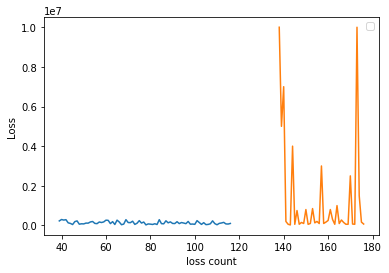

In [10]:
# plt.plot(den.Loss)
plt.plot(hos.Loss)
# plt.plot(ns.Loss)
# plt.plot(pod.Loss)
plt.plot(phy.Loss)
plt.legend(['Hospital'],['Physician'])
plt.xlabel('loss count')
plt.ylabel('Loss')
plt.show()